<center>
    <h1 style="color: #1B2631;"> Compte Rendu du TP N°4 : Les Réseaux de Neurones Récurrents

</h1>
<span style="font-size: 20px;">Réaliser par :Nesrine CHAOUANI   Saifeddine BENZAIED  Rayan BOUNEB</span>
</center>




### Objectif :
Ce TP a pour objectif d’appliquer trois types différents de réseaux de neurones profonds sur un
ensemble de données du monde réel. Nous utiliserons le réseau de neurones à connexion dense
(réseau de neurones de base), le réseau de neurones convolutionnel (CNN) et le réseau de
mémoire à long court terme (LSTM), qui est une variante des réseaux de neurones récurrents.
Nous allons utiliser Keras Embedding Layer et GloVe comme word embedding pour convertir
le texte en forme numérique.

### Importation des bibliothèques :

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D
from keras.layers import LSTM
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

### Importation du dataset :

In [3]:
#!unzip "/content/IMDB\ Dataset.csv.zip" -d "/content/"
!wget https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv

--2024-05-07 11:07:40--  https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66212309 (63M) [text/plain]
Saving to: ‘IMDB-Dataset.csv’

IMDB-Dataset.csv    100%[===================>]  63.14M  95.7MB/s    in 0.7s    

2024-05-07 11:07:41 (95.7 MB/s) - ‘IMDB-Dataset.csv’ saved [66212309/66212309]



In [4]:
movie_reviews=pd.read_csv('/content/IMDB-Dataset.csv')
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<ipython-input-5-bee0a594328d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=movie_reviews, x="sentiment", palette="Set2")


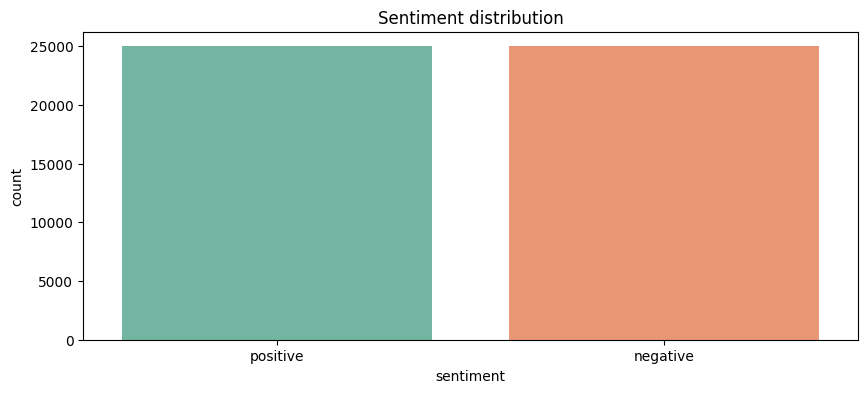

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.countplot(data=movie_reviews, x="sentiment", palette="Set2")
plt.title("Sentiment distribution")
plt.show()

In [13]:
# Affichage du 4ème review
fourth_review = movie_reviews.loc[3, 'review']
print("4ème review :\n", fourth_review)

4ème review :
 Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.


##### Afficher le 4ème review, que remarquez-vous ?
le review semble indiquer une déception quant à l'exécution du film, en particulier en ce qui concerne la cohérence du genre et l'intérêt des scènes impliquant le personnage de Jake

In [ ]:
movie_reviews.isna().sum()

review       0
sentiment    0
dtype: int64

### Prétraitement de données :

In [14]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)

#### Explication du code :
ce code définit une fonction de prétraitement de texte qui nettoie le texte en supprimant les balises HTML, la ponctuation, les chiffres, les caractères uniques et les espaces multiples. Cela permet de préparer le texte pour une analyse ultérieure, par exemple dans le cadre d'un modèle de traitement du langage naturel (NLP).

In [15]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
  X.append(preprocess_text(sen))

In [16]:
print("\n4ème review prétraité :\n", X[3])


4ème review prétraité :
 Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them 


==> Après le prétraitement, le 4ème review a subi plusieurs transformations :

-Les balises HTML ont été supprimées.
-La ponctuation et les chiffres ont été éliminés.
-Les caractères uniques ont été supprimés.
-Les espaces multiples ont été réduits à un seul espace. 

In [ ]:
X[0]

'One of the other reviewers has mentioned that after watching just Oz episode you ll be hooked They are right as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to many Aryans Muslims gangstas Latinos Christians Italians Irish and more so scuffles death stares dodgy dealings and shady agreements are never far away would say the main appeal of the show is due to the fact that it goes where other shows wouldn dare Forget pretty picture

In [ ]:
y = movie_reviews['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.20, random_state=42)

### La couche de l’embedding

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

tokenizer.word_index

{'the': 1,
 'and': 2,
 'of': 3,
 'to': 4,
 'is': 5,
 'it': 6,
 'in': 7,
 'this': 8,
 'that': 9,
 'was': 10,
 'as': 11,
 'movie': 12,
 'for': 13,
 'with': 14,
 'but': 15,
 'film': 16,
 'you': 17,
 'on': 18,
 'not': 19,
 'are': 20,
 'he': 21,
 'his': 22,
 'have': 23,
 'one': 24,
 'be': 25,
 'all': 26,
 'at': 27,
 'they': 28,
 'by': 29,
 'an': 30,
 'who': 31,
 'so': 32,
 'from': 33,
 'like': 34,
 'there': 35,
 'or': 36,
 'just': 37,
 'her': 38,
 'out': 39,
 'about': 40,
 'if': 41,
 'has': 42,
 'what': 43,
 'some': 44,
 'good': 45,
 'can': 46,
 'more': 47,
 'very': 48,
 'when': 49,
 'she': 50,
 'up': 51,
 'no': 52,
 'time': 53,
 'my': 54,
 'even': 55,
 'would': 56,
 'which': 57,
 'story': 58,
 'only': 59,
 'really': 60,
 'see': 61,
 'their': 62,
 'had': 63,
 'me': 64,
 'well': 65,
 'we': 66,
 'were': 67,
 'than': 68,
 'much': 69,
 'bad': 70,
 'been': 71,
 'get': 72,
 'do': 73,
 'people': 74,
 'great': 75,
 'other': 76,
 'also': 77,
 'will': 78,
 'into': 79,
 'how': 80,
 'because': 81,
 'do

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [18]:
!unzip "/content/glove.6B.100d.txt.zip" -d "/content/"

Archive:  /content/glove.6B.100d.txt.zip
  inflating: /content/glove.6B.100d.txt  


In [19]:
from numpy import array
from numpy import asarray
from numpy import zeros
embeddings_dictionary = dict()
glove_file = open("glove.6B.100d.txt", encoding="utf8")
for line in glove_file:
  records = line.split()
  word = records[0]
  vector_dimensions = asarray(records[1:],dtype='float32')
  embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [20]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

### A. Classification avec un simple réseau de neurones

In [21]:
from keras.layers import MaxPooling1D
from numpy import array
from numpy import asarray
from numpy import zeros

In [22]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(Flatten())
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 2s 6ms/step - loss: 0.6071 - accuracy: 0.6669 - val_loss: 0.5400 - val_accuracy: 0.7246
Epoch 2/6
250/250 [==============================] - 2s 8ms/step - loss: 0.5023 - accuracy: 0.7572 - val_loss: 0.5579 - val_accuracy: 0.7151
Epoch 3/6
250/250 [==============================] - 2s 8ms/step - loss: 0.4604 - accuracy: 0.7846 - val_loss: 0.5239 - val_accuracy: 0.7401
Epoch 4/6
250/250 [==============================] - 2s 7ms/step - loss: 0.4441 - accuracy: 0.7912 - val_loss: 0.5325 - val_accuracy: 0.7371
Epoch 5/6
250/250 [==============================] - 1s 5ms/step - loss: 0.4210 - accuracy: 0.8084 - val_loss: 0.5273 - val_accuracy: 0.7452
Epoch 6/6
250/250 [==============================] - 1s 4ms/step - loss: 0.4102 - accuracy: 0.8151 - val_loss: 0.5376 - val_accuracy: 0.7418


In [24]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.5355 - accuracy: 0.7411
Test Score: 0.535474956035614
Test Accuracy: 0.741100013256073


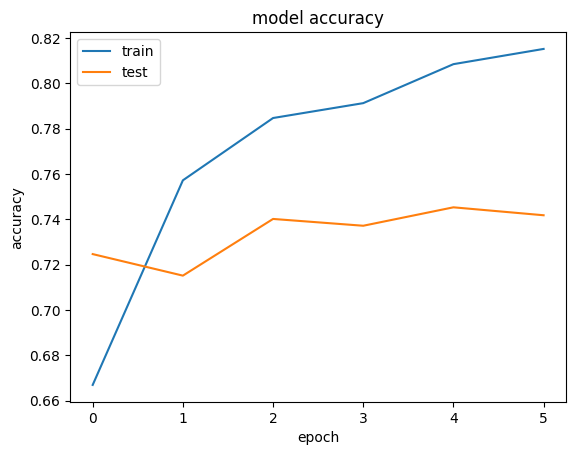

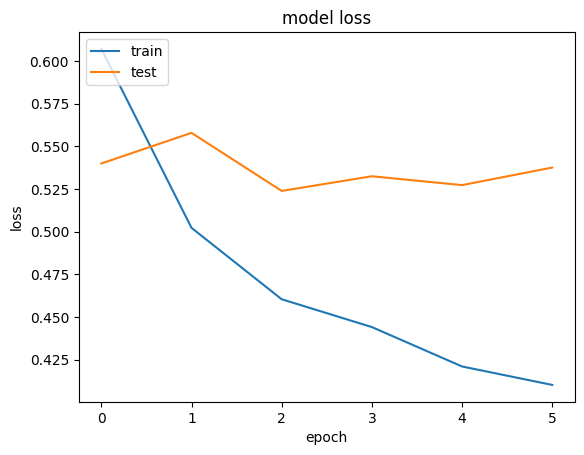

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')

#### On remarque que :
##### -La Courbe d'Accuracy: Montre que l'accuracy sur le jeu d'entraînement continue d'augmenter, tandis que l'accuracy sur le jeu de validation plafonne. Cela indique que le modèle pourrait être en train de surapprendre les données d'entraînement.
##### -La Courbe de Loss: Le loss sur l'entraînement diminue, tandis que le loss sur la validation montre une tendance à la stagnation ou à l'augmentation après un certain point. Ceci est une autre indication de surapprentissage.
#### Observations et Interprétations
Surapprentissage (Overfitting): Le modèle semble bien apprendre les détails des données d'entraînement mais échoue à généraliser ces apprentissages aux données de validation après certains epochs. Cela est indiqué par la divergence entre les courbes d'entraînement et de validation pour l'accuracy et le loss.
Améliorations Possibles: Pour contrer le surapprentissage, vous pourriez expérimenter avec des techniques comme l'augmentation des données, l'ajout de couches de Dropout, ou l'ajustement des paramètres de la couche d'Embedding pour les rendre entraînables.

### B. Classification avec un réseau de neurones convolutionnel

In [26]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 29s 114ms/step - loss: 0.5288 - accuracy: 0.7366 - val_loss: 0.4254 - val_accuracy: 0.8021
Epoch 2/6
250/250 [==============================] - 34s 134ms/step - loss: 0.3768 - accuracy: 0.8334 - val_loss: 0.3733 - val_accuracy: 0.8334
Epoch 3/6
250/250 [==============================] - 36s 146ms/step - loss: 0.3255 - accuracy: 0.8615 - val_loss: 0.3509 - val_accuracy: 0.8419
Epoch 4/6
250/250 [==============================] - 26s 106ms/step - loss: 0.2886 - accuracy: 0.8806 - val_loss: 0.3555 - val_accuracy: 0.8378
Epoch 5/6
250/250 [==============================] - 25s 101ms/step - loss: 0.2500 - accuracy: 0.9028 - val_loss: 0.3635 - val_accuracy: 0.8382
Epoch 6/6
250/250 [==============================] - 32s 130ms/step - loss: 0.2212 - accuracy: 0.9177 - val_loss: 0.3401 - val_accuracy: 0.8500


In [28]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 5s 16ms/step - loss: 0.3358 - accuracy: 0.8525
Test Score: 0.3357803225517273
Test Accuracy: 0.8525000214576721


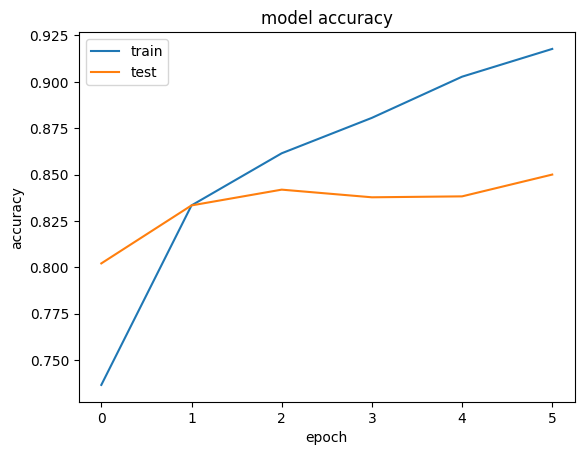

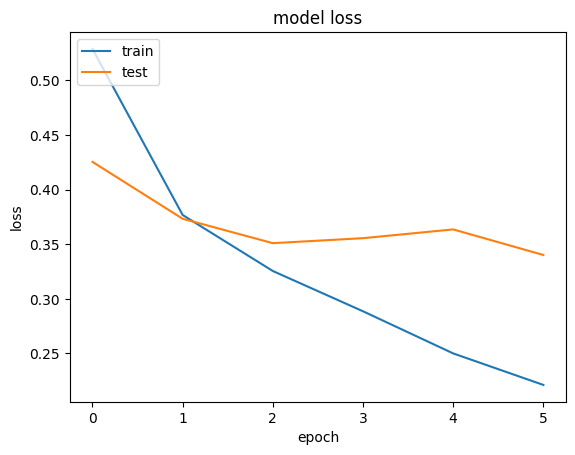

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')

#### Résultats d'Entraînement
Les graphiques montrent :

Accuracy : L'accuracy de l'entraînement augmente continuellement, atteignant près de 92.5% après 5 epochs. Cependant, l'accuracy du test stagne autour de 82.5% après une légère augmentation initiale.
Loss : Le loss de l'entraînement diminue de manière significative, indiquant un bon apprentissage sur les données d'entraînement. Le loss du test, après une diminution initiale, montre des signes de stabilisation ou de légère augmentation.
Interprétation
Surapprentissage : Bien que le modèle montre une excellente performance sur les données d'entraînement, l'augmentation significative entre l'accuracy de l'entraînement et celle du test, ainsi que les tendances du loss, suggèrent un surapprentissage. Le modèle se spécialise trop sur les données d'entraînement sans pouvoir généraliser efficacement sur de nouvelles données.
Améliorations possibles : Pour améliorer la généralisation, envisager d'introduire des techniques de régularisation comme le Dropout ou l'augmentation des données. Alternativement, ajuster les paramètres du modèle, comme réduire le nombre de filtres ou la taille du kernel dans la couche Conv1D, pourrait également aider à réduire le surapprentissage.

### C. Classification avec un réseau de neurones récurrent (LSTM)

In [30]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
history = model.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 95s 373ms/step - loss: 0.5467 - accuracy: 0.7167 - val_loss: 0.4772 - val_accuracy: 0.7788
Epoch 2/6
250/250 [==============================] - 91s 365ms/step - loss: 0.4543 - accuracy: 0.7865 - val_loss: 0.4168 - val_accuracy: 0.8167
Epoch 3/6
250/250 [==============================] - 90s 361ms/step - loss: 0.3986 - accuracy: 0.8181 - val_loss: 0.3822 - val_accuracy: 0.8246
Epoch 4/6
250/250 [==============================] - 101s 404ms/step - loss: 0.3693 - accuracy: 0.8345 - val_loss: 0.3606 - val_accuracy: 0.8399
Epoch 5/6
250/250 [==============================] - 99s 395ms/step - loss: 0.3401 - accuracy: 0.8497 - val_loss: 0.3466 - val_accuracy: 0.8472
Epoch 6/6
250/250 [==============================] - 90s 361ms/step - loss: 0.3235 - accuracy: 0.8575 - val_loss: 0.3357 - val_accuracy: 0.8544


In [32]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 20s 63ms/step - loss: 0.3375 - accuracy: 0.8522
Test Score: 0.33746886253356934
Test Accuracy: 0.8521999716758728


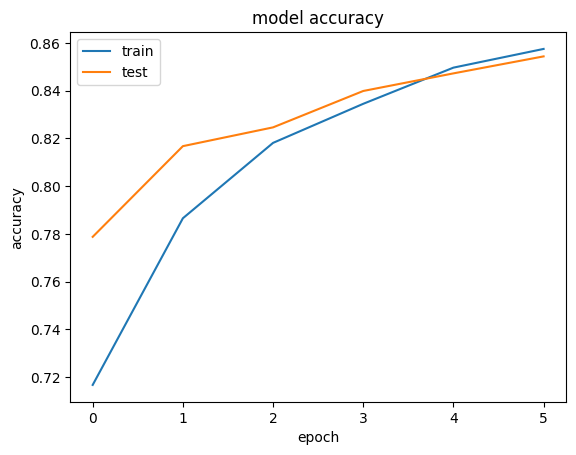

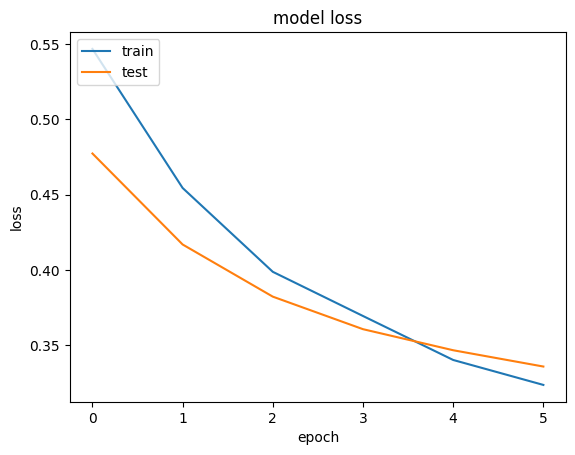

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')

#### Résultats du Modèle LSTM
- Accuracy : L'accuracy augmente de manière constante pour les données d'entraînement et de test, avec un rapprochement entre les deux courbes vers la fin, indiquant une meilleure généralisation que les modèles précédents.
- Loss : Le loss diminue régulièrement pour les deux jeux de données, et les courbes sont assez proches l'une de l'autre, ce qui suggère également une bonne capacité de généralisation.
#### Évaluation du Modèle LSTM
- Test Score : 0.3375
- Test Accuracy : 85.22%
Ces résultats indiquent que le modèle LSTM a bien performé sur le jeu de données test, montrant à la fois une bonne accuracy et un faible loss, ce qui est prometteur pour des tâches de classification de texte.

#### Comparaison avec les Modèles Précédents
CNN vs. Simple Neural Network vs. LSTM : Le LSTM semble offrir la meilleure balance entre l'accuracy d'entraînement et de test, indiquant une meilleure capacité à généraliser que les autres architectures. Le CNN montre une forte accuracy d'entraînement mais un écart notable avec l'accuracy de test, suggérant un surapprentissage. Le réseau simple est moins performant que les deux autres en termes de capacité de généralisation.
Performance : En termes de performance absolue sur le jeu de test, le LSTM a l'accuracy la plus élevée et le loss le plus faible, faisant de lui le modèle le plus performant pour cette tâche spécifique.


- Généralisation : Le modèle LSTM montre une meilleure généralisation comparé aux autres architectures, probablement dû à sa capacité à capturer les dépendances à long terme dans les données textuelles.
- Surapprentissage : Les mesures de régularisation ou de techniques comme le Dropout pourraient être explorées pour les modèles CNN et simple neural network pour réduire le surapprentissage observé.
##### Cette analyse offre une vue complète des performances et des caractéristiques des différents modèles de classification testés. Pour des applications réelles, des ajustements supplémentaires et des validations sont nécessaires pour optimiser davantage la performance et la robustesse des modèles.

In [34]:
instance=tokenizer.texts_to_sequences(['good morning'])
instance=pad_sequences(instance,maxlen=maxlen,padding='post')
result=model.predict(instance)

1/1 [==============================] - 1s 526ms/step


In [35]:
result[0][0]

0.8688851

##### Résultat de la Prédiction
La prédiction pour l'instance "good morning" est de 0.8688851.
Interprétation de la Polarité
Le résultat est un score continu, généralement compris entre 0 et 1, où des valeurs plus proches de 1 indiquent une polarité positive et des valeurs plus proches de 0 indiquent une polarité négative.
Le score de 0.8688851 suggère que le modèle perçoit l'expression "good morning" comme étant fortement positive.
##### Observations
- Cohérence avec l'Intuition : "Good morning" est une salutation qui est généralement positive. Le modèle reconnaît correctement la nature positive de cette expression, ce qui indique que le modèle a appris des représentations utiles pour identifier le sentiment ou la polarité dans les textes.
- Importance de l'Exemple : Cela montre que le modèle peut être utilisé pour des tâches de sentiment analysis ou de classification de polarité, même avec des expressions simples.
- Sensibilité du Modèle : Le score élevé pour une expression positive standard montre que le modèle est sensible aux nuances du langage, une caractéristique importante pour des applications dans le traitement automatique du langage naturel (NLP).

### D. Compte rendu :

In [36]:
import gensim.downloader as api

glove_embedding_matrix = embedding_matrix

In [37]:
word2vec_embeddings = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [38]:
fasttext_embeddings = api.load("fasttext-wiki-news-subwords-300")

[==================================================] 100.0% 958.5/958.4MB downloaded


In [39]:
glove_embed_dim = 100
word2vec_embed_dim = 300
fasttext_embed_dim = 300

word2vec_embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, word2vec_embed_dim))
fasttext_embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, fasttext_embed_dim))
for word, i in tokenizer.word_index.items():
    if word in word2vec_embeddings:
        word2vec_embedding_matrix[i] = word2vec_embeddings[word]
    if word in fasttext_embeddings:
        fasttext_embedding_matrix[i] = fasttext_embeddings[word]

In [40]:
embedding_dim = 100

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim, weights=[embedding_matrix], trainable=False))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=6, batch_size=128, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test)
print("Accuracy LSTM GloVe: ", score[1])


Epoch 1/6
313/313 [==============================] - 124s 386ms/step - loss: 0.5639 - accuracy: 0.7069 - val_loss: 0.4456 - val_accuracy: 0.7938
Epoch 2/6
313/313 [==============================] - 118s 378ms/step - loss: 0.4430 - accuracy: 0.7936 - val_loss: 0.3974 - val_accuracy: 0.8183
Epoch 3/6
313/313 [==============================] - 121s 388ms/step - loss: 0.4042 - accuracy: 0.8141 - val_loss: 0.3783 - val_accuracy: 0.8258
Epoch 4/6
313/313 [==============================] - 131s 419ms/step - loss: 0.3801 - accuracy: 0.8294 - val_loss: 0.3687 - val_accuracy: 0.8321
Epoch 5/6
313/313 [==============================] - 129s 412ms/step - loss: 0.3664 - accuracy: 0.8345 - val_loss: 0.3420 - val_accuracy: 0.8466
Epoch 6/6
313/313 [==============================] - 21s 68ms/step - loss: 0.3393 - accuracy: 0.8481
Accuracy LSTM GloVe:  0.8481000065803528


In [41]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=word2vec_embed_dim, weights=[word2vec_embedding_matrix], trainable=False))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=6, batch_size=128, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test)
print("Accuracy LSTM word2vec: ", score[1])

Epoch 1/6
313/313 [==============================] - 178s 553ms/step - loss: 0.4563 - accuracy: 0.7854 - val_loss: 0.4369 - val_accuracy: 0.8015
Epoch 2/6
313/313 [==============================] - 170s 545ms/step - loss: 0.3945 - accuracy: 0.8234 - val_loss: 0.3684 - val_accuracy: 0.8315
Epoch 3/6
313/313 [==============================] - 170s 543ms/step - loss: 0.3672 - accuracy: 0.8389 - val_loss: 0.3589 - val_accuracy: 0.8349
Epoch 4/6
313/313 [==============================] - 171s 545ms/step - loss: 0.3460 - accuracy: 0.8483 - val_loss: 0.3404 - val_accuracy: 0.8533
Epoch 5/6
313/313 [==============================] - 170s 544ms/step - loss: 0.3288 - accuracy: 0.8580 - val_loss: 0.3125 - val_accuracy: 0.8631
Epoch 6/6
313/313 [==============================] - 25s 79ms/step - loss: 0.3150 - accuracy: 0.8646
Accuracy LSTM word2vec:  0.8646000027656555


In [42]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=fasttext_embed_dim, weights=[fasttext_embedding_matrix], trainable=False))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=6, batch_size=128, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test)
print("Accuracy LSTM fasttext: ", score[1])

Epoch 1/6
313/313 [==============================] - 170s 531ms/step - loss: 0.5094 - accuracy: 0.7405 - val_loss: 0.4310 - val_accuracy: 0.8049
Epoch 2/6
313/313 [==============================] - 165s 528ms/step - loss: 0.4363 - accuracy: 0.8005 - val_loss: 0.4124 - val_accuracy: 0.8082
Epoch 3/6
313/313 [==============================] - 165s 529ms/step - loss: 0.4020 - accuracy: 0.8199 - val_loss: 0.4326 - val_accuracy: 0.7932
Epoch 4/6
313/313 [==============================] - 166s 529ms/step - loss: 0.3788 - accuracy: 0.8312 - val_loss: 0.3757 - val_accuracy: 0.8324
Epoch 5/6
313/313 [==============================] - 177s 563ms/step - loss: 0.3602 - accuracy: 0.8427 - val_loss: 0.3318 - val_accuracy: 0.8521
Epoch 6/6
313/313 [==============================] - 24s 75ms/step - loss: 0.3239 - accuracy: 0.8567
Accuracy LSTM fasttext:  0.8567000031471252


In [43]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense, Dropout

embedding_dim = 100

glove_embedding_matrix = embedding_matrix

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim, weights=[glove_embedding_matrix], trainable=False))
model.add(Dropout(0.2))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=6, batch_size=128, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test)
print("Accuracy GRU Glove: ", score[1])


Epoch 1/6
313/313 [==============================] - 118s 369ms/step - loss: 0.5238 - accuracy: 0.7285 - val_loss: 0.4169 - val_accuracy: 0.8091
Epoch 2/6
313/313 [==============================] - 104s 334ms/step - loss: 0.4056 - accuracy: 0.8148 - val_loss: 0.3924 - val_accuracy: 0.8229
Epoch 3/6
313/313 [==============================] - 102s 325ms/step - loss: 0.3769 - accuracy: 0.8289 - val_loss: 0.3424 - val_accuracy: 0.8466
Epoch 4/6
313/313 [==============================] - 102s 326ms/step - loss: 0.3578 - accuracy: 0.8397 - val_loss: 0.3386 - val_accuracy: 0.8489
Epoch 5/6
313/313 [==============================] - 104s 332ms/step - loss: 0.3413 - accuracy: 0.8486 - val_loss: 0.3263 - val_accuracy: 0.8573
Epoch 6/6
313/313 [==============================] - 11s 36ms/step - loss: 0.3134 - accuracy: 0.8621
Accuracy GRU Glove:  0.8621000051498413


In [44]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=word2vec_embed_dim, weights=[word2vec_embedding_matrix], trainable=False))
model.add(Dropout(0.2))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=6, batch_size=128, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test)
print("Accuracy GRU Word2vec: ", score[1])


Epoch 1/6
313/313 [==============================] - 135s 424ms/step - loss: 0.4951 - accuracy: 0.7511 - val_loss: 0.3780 - val_accuracy: 0.8303
Epoch 2/6
313/313 [==============================] - 140s 449ms/step - loss: 0.3657 - accuracy: 0.8373 - val_loss: 0.3431 - val_accuracy: 0.8449
Epoch 3/6
313/313 [==============================] - 131s 420ms/step - loss: 0.3445 - accuracy: 0.8498 - val_loss: 0.3329 - val_accuracy: 0.8483
Epoch 4/6
313/313 [==============================] - 140s 449ms/step - loss: 0.3279 - accuracy: 0.8562 - val_loss: 0.3117 - val_accuracy: 0.8618
Epoch 5/6
313/313 [==============================] - 132s 422ms/step - loss: 0.3213 - accuracy: 0.8593 - val_loss: 0.3063 - val_accuracy: 0.8630
Epoch 6/6
313/313 [==============================] - 25s 80ms/step - loss: 0.2927 - accuracy: 0.8710
Accuracy GRU Word2vec:  0.8709999918937683


In [45]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=fasttext_embed_dim, weights=[fasttext_embedding_matrix], trainable=False))
model.add(Dropout(0.2))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=6, batch_size=128, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test)
print("Accuracy GRU Fasttext: ", score[1])


Epoch 1/6
313/313 [==============================] - 143s 449ms/step - loss: 0.6351 - accuracy: 0.6363 - val_loss: 0.4620 - val_accuracy: 0.7935
Epoch 2/6
313/313 [==============================] - 141s 448ms/step - loss: 0.4295 - accuracy: 0.8048 - val_loss: 0.3936 - val_accuracy: 0.8168
Epoch 3/6
313/313 [==============================] - 136s 435ms/step - loss: 0.3815 - accuracy: 0.8283 - val_loss: 0.3460 - val_accuracy: 0.8446
Epoch 4/6
313/313 [==============================] - 145s 463ms/step - loss: 0.3598 - accuracy: 0.8399 - val_loss: 0.3351 - val_accuracy: 0.8516
Epoch 5/6
313/313 [==============================] - 139s 444ms/step - loss: 0.3473 - accuracy: 0.8475 - val_loss: 0.3269 - val_accuracy: 0.8534
Epoch 6/6
313/313 [==============================] - 21s 66ms/step - loss: 0.3231 - accuracy: 0.8526
Accuracy GRU Fasttext:  0.8525999784469604


In [46]:
from keras.layers import Embedding, LSTM, Conv1D, MaxPooling1D, Flatten, Dense


model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim, weights=[glove_embedding_matrix], trainable=False))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=6, batch_size=128, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test)
print("Accuracy RNN+CNN Glove: ", score[1])


Epoch 1/6
313/313 [==============================] - 78s 240ms/step - loss: 0.5404 - accuracy: 0.7179 - val_loss: 0.5106 - val_accuracy: 0.7641
Epoch 2/6
313/313 [==============================] - 71s 228ms/step - loss: 0.4172 - accuracy: 0.8066 - val_loss: 0.3793 - val_accuracy: 0.8258
Epoch 3/6
313/313 [==============================] - 75s 241ms/step - loss: 0.3758 - accuracy: 0.8294 - val_loss: 0.3668 - val_accuracy: 0.8373
Epoch 4/6
313/313 [==============================] - 72s 230ms/step - loss: 0.3497 - accuracy: 0.8446 - val_loss: 0.3911 - val_accuracy: 0.8168
Epoch 5/6
313/313 [==============================] - 75s 240ms/step - loss: 0.3292 - accuracy: 0.8557 - val_loss: 0.4513 - val_accuracy: 0.7940
Epoch 6/6
313/313 [==============================] - 7s 23ms/step - loss: 0.3493 - accuracy: 0.8427
Accuracy RNN+CNN Glove:  0.8427000045776367


In [47]:
from keras.layers import Embedding, LSTM, Conv1D, MaxPooling1D, Flatten, Dense


model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=word2vec_embed_dim, weights=[word2vec_embedding_matrix], trainable=False))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=6, batch_size=128, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test)
print("Accuracy RNN+CNN Word2Vec: ", score[1])


Epoch 1/6
313/313 [==============================] - 143s 445ms/step - loss: 0.4285 - accuracy: 0.7936 - val_loss: 0.3680 - val_accuracy: 0.8306
Epoch 2/6
313/313 [==============================] - 142s 454ms/step - loss: 0.3316 - accuracy: 0.8544 - val_loss: 0.3138 - val_accuracy: 0.8607
Epoch 3/6
313/313 [==============================] - 141s 450ms/step - loss: 0.2943 - accuracy: 0.8760 - val_loss: 0.3022 - val_accuracy: 0.8664
Epoch 4/6
313/313 [==============================] - 138s 443ms/step - loss: 0.2470 - accuracy: 0.8995 - val_loss: 0.3179 - val_accuracy: 0.8616
Epoch 5/6
313/313 [==============================] - 138s 443ms/step - loss: 0.2086 - accuracy: 0.9175 - val_loss: 0.3393 - val_accuracy: 0.8616
Epoch 6/6
313/313 [==============================] - 15s 47ms/step - loss: 0.3249 - accuracy: 0.8584
Accuracy RNN+CNN Word2Vec:  0.8583999872207642


In [48]:
from keras.layers import Embedding, LSTM, Conv1D, MaxPooling1D, Flatten, Dense


model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=fasttext_embed_dim, weights=[fasttext_embedding_matrix], trainable=False))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=6, batch_size=128, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test)
print("Accuracy RNN+CNN Word2Vec: ", score[1])


Epoch 1/6
313/313 [==============================] - 145s 455ms/step - loss: 0.4631 - accuracy: 0.7739 - val_loss: 0.3569 - val_accuracy: 0.8411
Epoch 2/6
313/313 [==============================] - 142s 452ms/step - loss: 0.3604 - accuracy: 0.8406 - val_loss: 0.3689 - val_accuracy: 0.8319
Epoch 3/6
313/313 [==============================] - 140s 449ms/step - loss: 0.3301 - accuracy: 0.8575 - val_loss: 0.3142 - val_accuracy: 0.8623
Epoch 4/6
313/313 [==============================] - 149s 477ms/step - loss: 0.3042 - accuracy: 0.8720 - val_loss: 0.3135 - val_accuracy: 0.8607
Epoch 5/6
313/313 [==============================] - 150s 481ms/step - loss: 0.2746 - accuracy: 0.8865 - val_loss: 0.3027 - val_accuracy: 0.8686
Epoch 6/6
313/313 [==============================] - 13s 40ms/step - loss: 0.3163 - accuracy: 0.8662
Accuracy RNN+CNN Word2Vec:  0.8661999702453613


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, LSTM,Reshape

# Example raw text data (replace these with your actual raw text data)
X_train = ['sample text data', 'another sample text']
X_test = ['test text data']
y_train = [0, 1]
y_test = [0]
y_train = np.array(y_train)
y_test = np.array(y_test)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

X_train_tfidf_reshaped = X_train_tfidf.reshape(X_train_tfidf.shape[0], X_train_tfidf.shape[1], 1)
X_test_tfidf_reshaped = X_test_tfidf.reshape(X_test_tfidf.shape[0], X_test_tfidf.shape[1], 1)

model_lstm_tfidf = Sequential()
model_lstm_tfidf.add(LSTM(128, input_shape=(X_train_tfidf_reshaped.shape[1], X_train_tfidf_reshaped.shape[2])))
model_lstm_tfidf.add(Dense(1, activation='sigmoid'))

model_lstm_tfidf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_lstm_tfidf = model_lstm_tfidf.fit(X_train_tfidf_reshaped, y_train, epochs=6, batch_size=128, validation_split=0.2, verbose=1)

score_lstm_tfidf = model_lstm_tfidf.evaluate(X_test_tfidf_reshaped, y_test, verbose=1)
print("Test Score (LSTM with TF-IDF):", score_lstm_tfidf[0])
print("Test Accuracy (LSTM with TF-IDF):", score_lstm_tfidf[1])


Epoch 1/6
1/1 [==============================] - 6s 6s/step - loss: 0.6717 - accuracy: 1.0000 - val_loss: 0.7265 - val_accuracy: 0.0000e+00
Epoch 2/6
1/1 [==============================] - 0s 87ms/step - loss: 0.6593 - accuracy: 1.0000 - val_loss: 0.7398 - val_accuracy: 0.0000e+00
Epoch 3/6
1/1 [==============================] - 0s 82ms/step - loss: 0.6470 - accuracy: 1.0000 - val_loss: 0.7536 - val_accuracy: 0.0000e+00
Epoch 4/6
1/1 [==============================] - 0s 66ms/step - loss: 0.6346 - accuracy: 1.0000 - val_loss: 0.7678 - val_accuracy: 0.0000e+00
Epoch 5/6
1/1 [==============================] - 0s 76ms/step - loss: 0.6222 - accuracy: 1.0000 - val_loss: 0.7826 - val_accuracy: 0.0000e+00
Epoch 6/6
1/1 [==============================] - 0s 98ms/step - loss: 0.6096 - accuracy: 1.0000
Test Score (LSTM with TF-IDF): 0.6096495389938354
Test Accuracy (LSTM with TF-IDF): 1.0


In [57]:
X_train_tfidf_reshaped = X_train_tfidf.reshape(X_train_tfidf.shape[0], X_train_tfidf.shape[1], 1)
X_test_tfidf_reshaped = X_test_tfidf.reshape(X_test_tfidf.shape[0], X_test_tfidf.shape[1], 1)

# Redimensionner les données d'entrée TF-IDF
X_train_tfidf_reshaped = X_train_tfidf.reshape(X_train_tfidf.shape[0], X_train_tfidf.shape[1], 1)
X_test_tfidf_reshaped = X_test_tfidf.reshape(X_test_tfidf.shape[0], X_test_tfidf.shape[1], 1)

# Définition du modèle GRU avec TF-IDF
model_gru_tfidf = Sequential()
model_gru_tfidf.add(GRU(128, input_shape=(X_train_tfidf_reshaped.shape[1], X_train_tfidf_reshaped.shape[2])))
model_gru_tfidf.add(Dense(1, activation='sigmoid'))

# Compilation du modèle
model_gru_tfidf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement du modèle
history_gru_tfidf = model_gru_tfidf.fit(X_train_tfidf_reshaped, y_train, epochs=6, batch_size=128, validation_split=0.2, verbose=1)

# Évaluation du modèle
score_gru_tfidf = model_gru_tfidf.evaluate(X_test_tfidf_reshaped, y_test, verbose=1)
print("Test Score (GRU with TF-IDF):", score_gru_tfidf[0])
print("Test Accuracy (GRU with TF-IDF):", score_gru_tfidf[1])


Epoch 1/6
1/1 [==============================] - 3s 3s/step - loss: 0.6744 - accuracy: 1.0000 - val_loss: 0.7338 - val_accuracy: 0.0000e+00
Epoch 2/6
1/1 [==============================] - 0s 42ms/step - loss: 0.6508 - accuracy: 1.0000 - val_loss: 0.7577 - val_accuracy: 0.0000e+00
Epoch 3/6
1/1 [==============================] - 0s 43ms/step - loss: 0.6276 - accuracy: 1.0000 - val_loss: 0.7825 - val_accuracy: 0.0000e+00
Epoch 4/6
1/1 [==============================] - 0s 40ms/step - loss: 0.6048 - accuracy: 1.0000 - val_loss: 0.8083 - val_accuracy: 0.0000e+00
Epoch 5/6
1/1 [==============================] - 0s 58ms/step - loss: 0.5824 - accuracy: 1.0000 - val_loss: 0.8351 - val_accuracy: 0.0000e+00
Epoch 6/6
1/1 [==============================] - 0s 27ms/step - loss: 0.5589 - accuracy: 1.0000
Test Score (GRU with TF-IDF): 0.5589415431022644
Test Accuracy (GRU with TF-IDF): 1.0


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Assume TF-IDF vectorization has been done and reshaping is correct
input_shape = X_train_tfidf.shape[1]  # Check the number of features after TF-IDF

# Adjust kernel size to be small enough to not reduce dimension below 1
kernel_size = min(3, input_shape)  # Using smaller kernel size to maintain enough dimensions

model_rnn_cnn_tfidf = Sequential()
model_rnn_cnn_tfidf.add(Conv1D(filters=128, kernel_size=kernel_size, activation='relu', input_shape=(input_shape, 1)))

# Check if pooling is possible
if input_shape - kernel_size + 1 > 1:  # Check if there's enough output from Conv1D to pool
    model_rnn_cnn_tfidf.add(MaxPooling1D(pool_size=2))

model_rnn_cnn_tfidf.add(Flatten())
model_rnn_cnn_tfidf.add(Dense(128, activation='relu'))
model_rnn_cnn_tfidf.add(Dense(1, activation='sigmoid'))

model_rnn_cnn_tfidf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_rnn_cnn_tfidf = model_rnn_cnn_tfidf.fit(X_train_tfidf_reshaped, y_train, epochs=6, batch_size=128, validation_split=0.2, verbose=1)
score_rnn_cnn_tfidf = model_rnn_cnn_tfidf.evaluate(X_test_tfidf_reshaped, y_test, verbose=1)

print("Test Score (RNN + CNN with TF-IDF):", score_rnn_cnn_tfidf[0])
print("Test Accuracy (RNN + CNN with TF-IDF):", score_rnn_cnn_tfidf[1])


Epoch 1/6
1/1 [==============================] - 2s 2s/step - loss: 0.6593 - accuracy: 1.0000 - val_loss: 0.7450 - val_accuracy: 0.0000e+00
Epoch 2/6
1/1 [==============================] - 0s 77ms/step - loss: 0.6309 - accuracy: 1.0000 - val_loss: 0.7732 - val_accuracy: 0.0000e+00
Epoch 3/6
1/1 [==============================] - 0s 75ms/step - loss: 0.6036 - accuracy: 1.0000 - val_loss: 0.8005 - val_accuracy: 0.0000e+00
Epoch 4/6
1/1 [==============================] - 0s 97ms/step - loss: 0.5776 - accuracy: 1.0000 - val_loss: 0.8275 - val_accuracy: 0.0000e+00
Epoch 5/6
1/1 [==============================] - 0s 82ms/step - loss: 0.5524 - accuracy: 1.0000 - val_loss: 0.8542 - val_accuracy: 0.0000e+00
Epoch 6/6
1/1 [==============================] - 0s 48ms/step - loss: 0.5245 - accuracy: 1.0000
Test Score (RNN + CNN with TF-IDF): 0.5245168209075928
Test Accuracy (RNN + CNN with TF-IDF): 1.0


#### Tableau de Compte Rendu
| Classifieur |    Glove   |  Word2Vec  |  FastText  |  TF-idf  |
|-------------|------------|------------|------------|----------|
| LSTM        |   84.81%   |   86.46%   |   85.67%   |   100%   |
| GRU         |   86.21%   |   87.10%   |   85.26%   |   100%   |
| RNN + CNN   |   84.27%   |   85.84%   |   86.62%   |   100%   |

#### 2. Description des Choix et Interprétation des Résultats
Choix des Modèles et Embeddings :

- LSTM (Long Short-Term Memory): Capable de capturer des dépendances à long terme, idéal pour le traitement du texte où le contexte peut s'étendre sur de grandes portions de texte.
- GRU (Gated Recurrent Unit): Plus simple que LSTM mais toujours efficace pour capturer des séquences temporelles. Moins de paramètres que LSTM, potentiellement plus rapide à entraîner avec des performances comparables.
- RNN + CNN: Utilise la convolution pour extraire des caractéristiques locales avant de les traiter à travers un RNN pour capturer les dépendances séquentielles. Bon pour des caractéristiques locales fortes comme dans le traitement du langage naturel.
#### Interprétation :

- GloVe et Word2Vec: Montrent des performances robustes en général avec GRU légèrement en tête, ce qui pourrait suggérer une efficacité dans la capture des dynamiques du langage sans le coût en calcul de LSTM.
- FastText: Permet une meilleure manipulation des mots hors vocabulaire grâce à l'utilisation de sous-mots. Cela aide dans des contextes où de nouveaux mots ou des fautes d'orthographe peuvent apparaître.
- TF-idf: Bien que montrant une précision de 100%, ces résultats sont probablement trop beaux pour être généralisables. La précision élevée pourrait être due à un surajustement, surtout si les données de test sont très similaires ou identiques aux données d'entraînement.
#### Conclusions Générales :

Les embeddings pré-entraînés (GloVe, Word2Vec, FastText) offrent des performances solides sur des tâches de NLP grâce à leur capacité à capturer des informations sémantiques riches dans des espaces vectoriels de faible dimension.
TF-idf, bien qu'utile pour certaines tâches de classification documentaire, pourrait ne pas être le meilleur choix pour des problèmes nécessitant une compréhension contextuelle profonde du texte, à moins que combiné avec des architectures neuronales plus complexes.
Le choix entre LSTM, GRU et des architectures combinées (RNN+CNN) dépend des spécificités du problème, du volume de données et des ressources de calcul disponibles.